Saving Autotheft.csv to Autotheft (1).csv

Model Performance Metrics:
               Model       RMSE        MAE        R²
0  Gradient Boosting  38.470700  22.498502  0.678340
1      Random Forest  34.164482  20.349062  0.746319
2  Linear Regression  38.382920  23.960388  0.679806


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

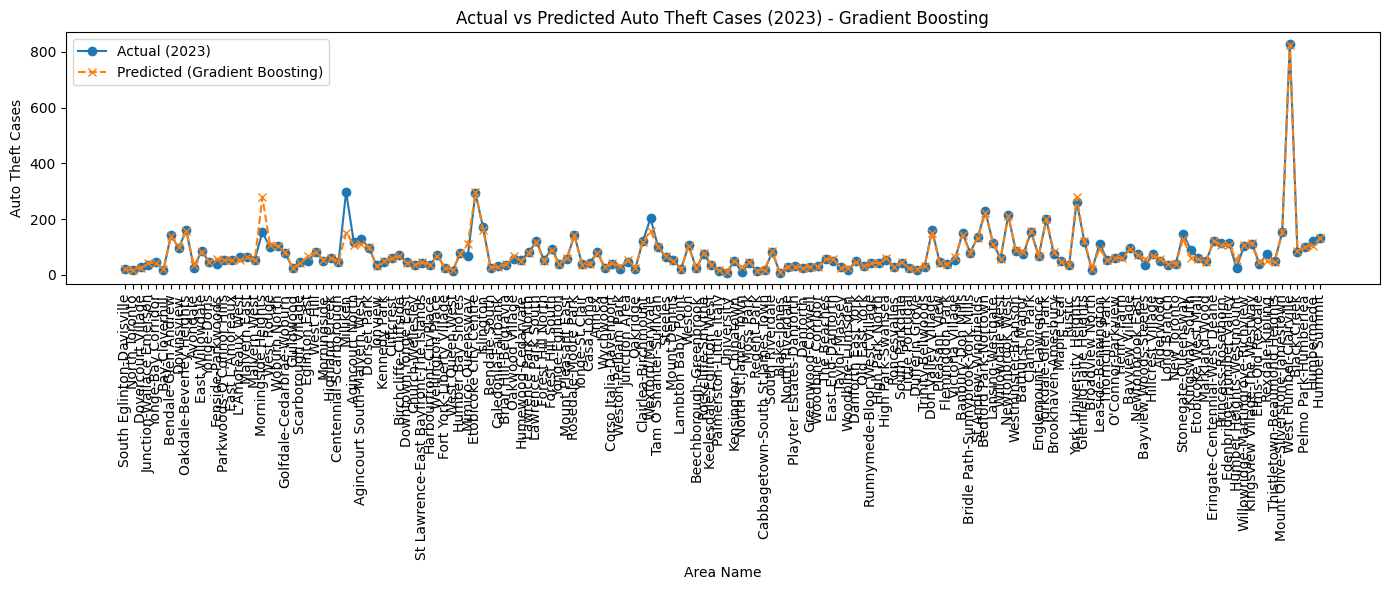

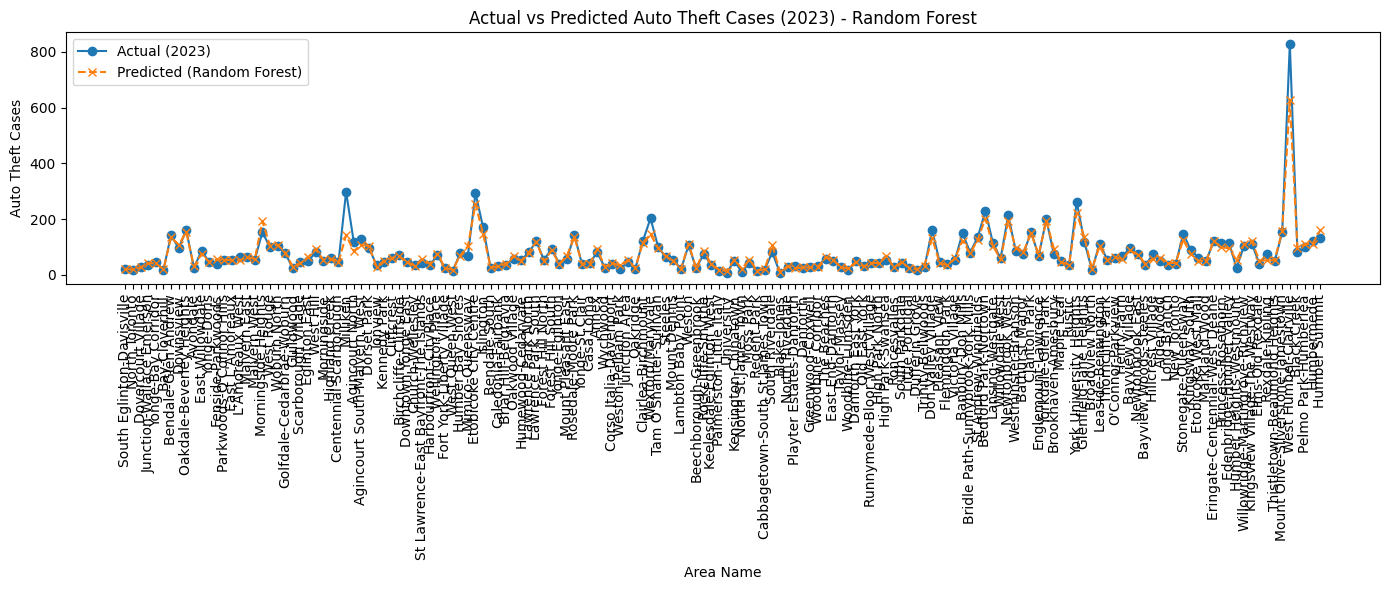

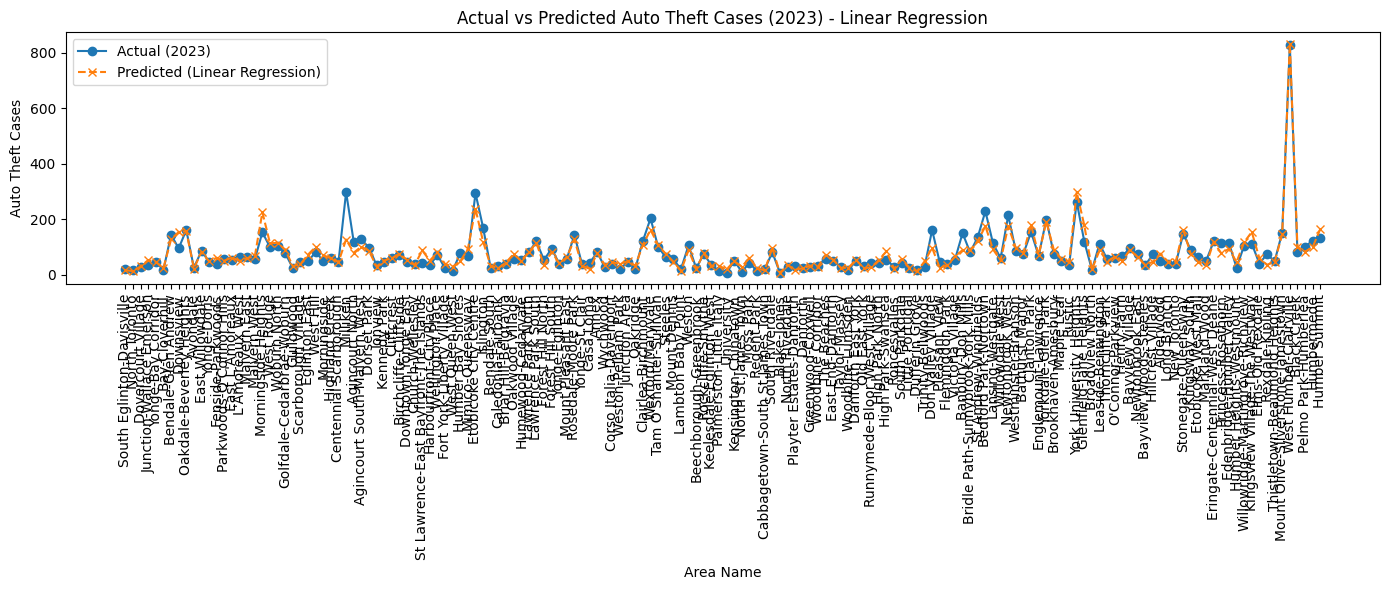

In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from google.colab import files
import matplotlib.pyplot as plt

# Step 1: Upload dataset in Google Colab
uploaded = files.upload()
filename = list(uploaded.keys())[0]
data_autotheft = pd.read_csv(filename)

# Step 2: Define features and target
features = [
    'AUTOTHEFT_2014', 'AUTOTHEFT_2015', 'AUTOTHEFT_2016', 'AUTOTHEFT_2017',
    'AUTOTHEFT_2018', 'AUTOTHEFT_2019', 'AUTOTHEFT_2020', 'AUTOTHEFT_2021',
    'AUTOTHEFT_2022', 'POPULATION_2023', 'Shape__Area', 'Shape__Length'
]
target = 'AUTOTHEFT_2023'

# Check for missing columns
missing_columns = [col for col in features + [target] if col not in data_autotheft.columns]
if missing_columns:
    raise ValueError(f"Missing columns in dataset: {missing_columns}")

# Step 3: Prepare features (X) and target (y)
X = data_autotheft[features]
y = data_autotheft[target]

# Step 4: Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Initialize models
models = {
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Linear Regression": LinearRegression()
}

# Step 6: Hyperparameter Optimization for Gradient Boosting and Random Forest
optimized_models = {}
param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20]
}

# Gradient Boosting Optimization
gb_grid = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid_gb, scoring='r2', cv=5)
gb_grid.fit(X_train, y_train)
optimized_models["Gradient Boosting"] = gb_grid.best_estimator_

# Random Forest Optimization
rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, scoring='r2', cv=5)
rf_grid.fit(X_train, y_train)
optimized_models["Random Forest"] = rf_grid.best_estimator_

# Linear Regression does not require hyperparameter tuning
optimized_models["Linear Regression"] = models["Linear Regression"]

# Step 7: Evaluate Models
results = []
area_predictions = pd.DataFrame({"Area Name": data_autotheft["AREA_NAME"], "Actual (2023)": y})

for model_name, model in optimized_models.items():
    # Train the optimized model
    model.fit(X_train, y_train)

    # Predict on the entire dataset
    predictions = model.predict(X)
    area_predictions[f"Predicted ({model_name})"] = predictions

    # Evaluate on the test set
    y_test_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mae = mean_absolute_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    results.append({"Model": model_name, "RMSE": rmse, "MAE": mae, "R²": r2})

    # Calculate errors and accuracy for the entire dataset
    area_predictions[f"Absolute Error ({model_name})"] = abs(area_predictions["Actual (2023)"] - predictions)
    area_predictions[f"Percentage Error ({model_name})"] = (
        area_predictions[f"Absolute Error ({model_name})"] / area_predictions["Actual (2023)"]
    ) * 100
    area_predictions[f"Accuracy (%) ({model_name})"] = 100 - area_predictions[f"Percentage Error ({model_name})"]

# Convert results to a DataFrame
results_df = pd.DataFrame(results)
print("\nModel Performance Metrics:")
print(results_df)

# Step 8: Save and Download the predictions with errors and accuracy
output_file = "AutoTheft_Actual_vs_Predicted_Errors_Accuracy.csv"
area_predictions.to_csv(output_file, index=False)
files.download(output_file)

# Step 9: Visualize Actual vs Predicted for each model
for model_name in optimized_models.keys():
    plt.figure(figsize=(14, 6))
    plt.plot(area_predictions["Area Name"], area_predictions["Actual (2023)"], label="Actual (2023)", marker='o')
    plt.plot(area_predictions["Area Name"], area_predictions[f"Predicted ({model_name})"], label=f"Predicted ({model_name})", linestyle='--', marker='x')
    plt.xticks(rotation=90)
    plt.title(f"Actual vs Predicted Auto Theft Cases (2023) - {model_name}")
    plt.xlabel("Area Name")
    plt.ylabel("Auto Theft Cases")
    plt.legend()
    plt.tight_layout()
    plt.show()


Saving Assault.csv to Assault.csv

Model Performance Metrics:
               Model       RMSE        MAE        R²
0  Gradient Boosting  25.522608  18.517806  0.941177
1      Random Forest  29.537686  16.857187  0.921214
2  Linear Regression  26.651228  17.145921  0.935860


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

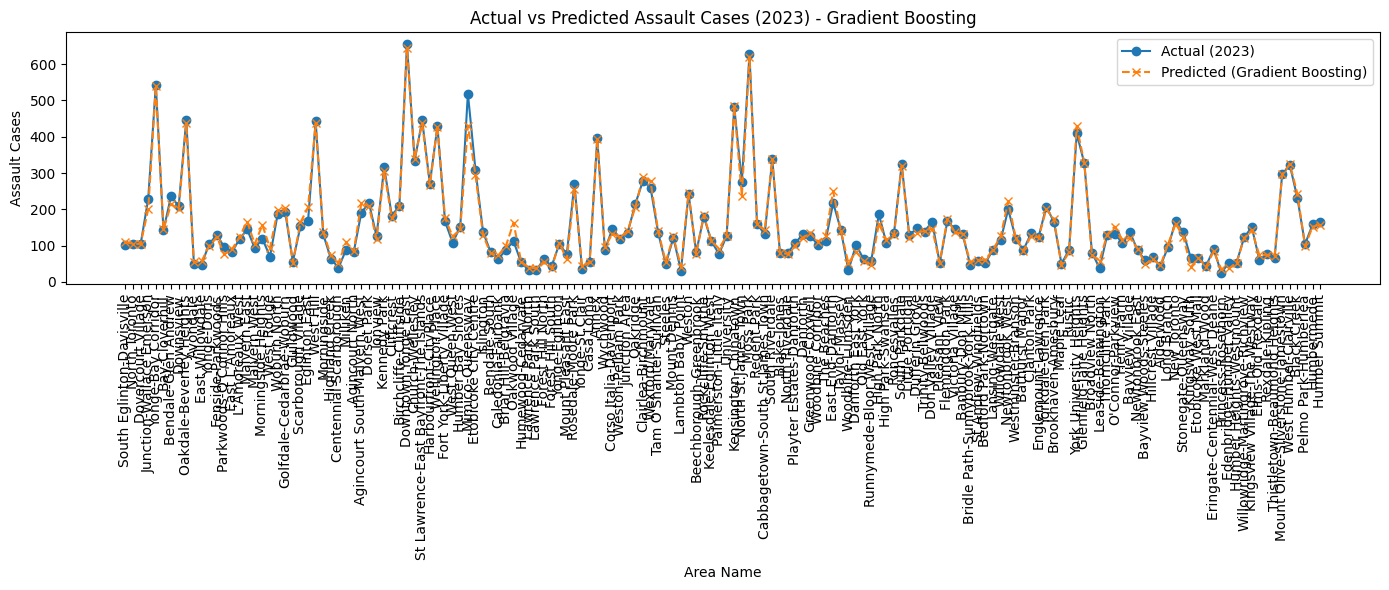

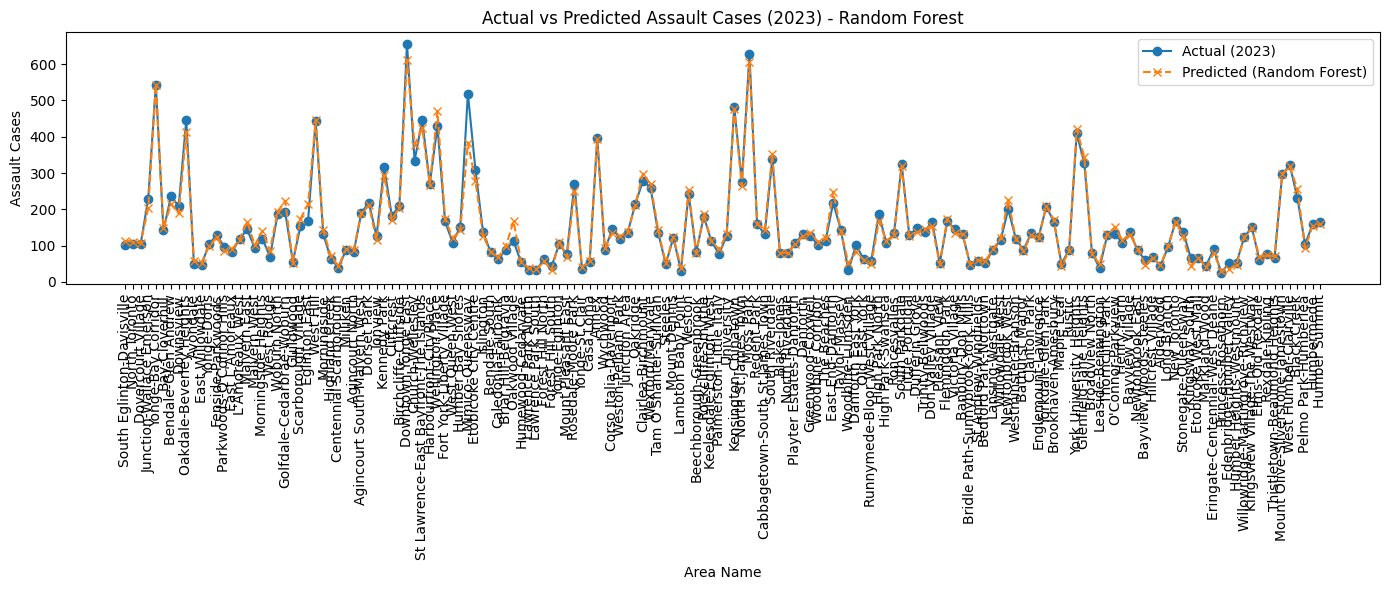

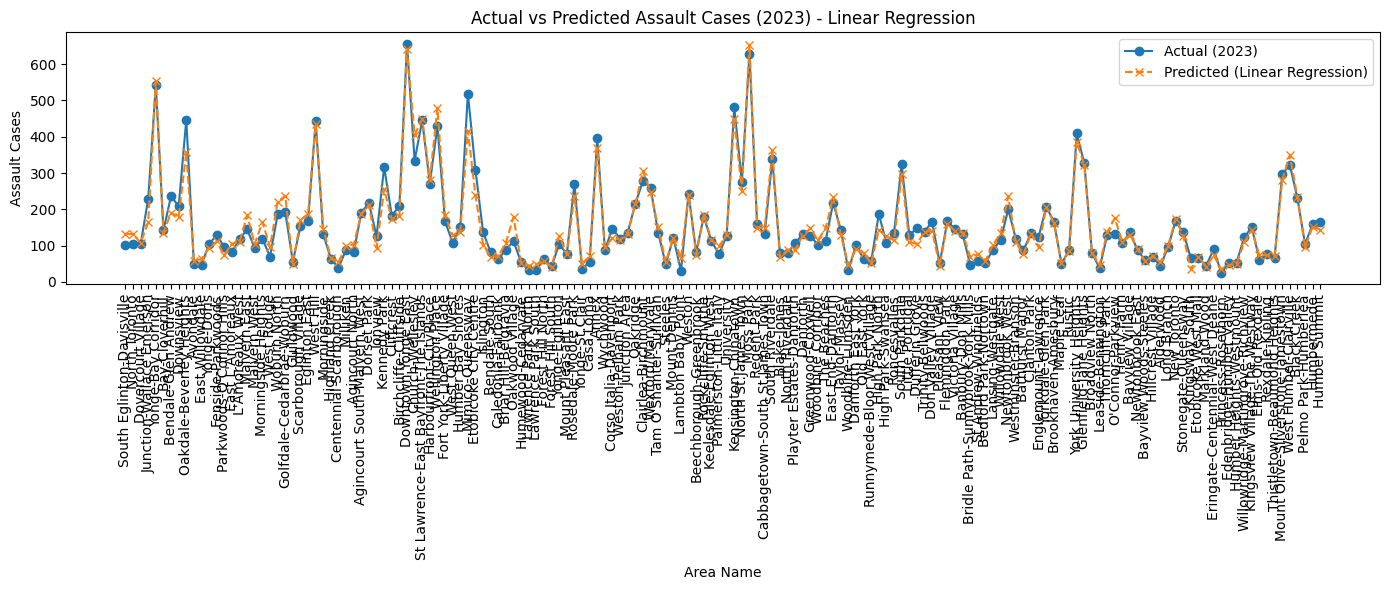

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from google.colab import files
import matplotlib.pyplot as plt

# Step 1: Upload dataset in Google Colab
uploaded = files.upload()
filename = list(uploaded.keys())[0]
data_assault = pd.read_csv(filename)

# Step 2: Define features and target
features = [
    'ASSAULT_2014', 'ASSAULT_2015', 'ASSAULT_2016', 'ASSAULT_2017',
    'ASSAULT_2018', 'ASSAULT_2019', 'ASSAULT_2020', 'ASSAULT_2021',
    'ASSAULT_2022', 'POPULATION_2023', 'Shape__Area', 'Shape__Length'
]
target = 'ASSAULT_2023'

# Check for missing columns
missing_columns = [col for col in features + [target] if col not in data_assault.columns]
if missing_columns:
    raise ValueError(f"Missing columns in dataset: {missing_columns}")

# Step 3: Prepare features (X) and target (y)
X = data_assault[features]
y = data_assault[target]

# Step 4: Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Initialize models
models = {
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Linear Regression": LinearRegression()
}

# Step 6: Hyperparameter Optimization for Gradient Boosting and Random Forest
optimized_models = {}
param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20]
}

# Gradient Boosting Optimization
gb_grid = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid_gb, scoring='r2', cv=5)
gb_grid.fit(X_train, y_train)
optimized_models["Gradient Boosting"] = gb_grid.best_estimator_

# Random Forest Optimization
rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, scoring='r2', cv=5)
rf_grid.fit(X_train, y_train)
optimized_models["Random Forest"] = rf_grid.best_estimator_

# Linear Regression does not require hyperparameter tuning
optimized_models["Linear Regression"] = models["Linear Regression"]

# Step 7: Evaluate Models
results = []
area_predictions = pd.DataFrame({"Area Name": data_assault["AREA_NAME"], "Actual (2023)": y})

for model_name, model in optimized_models.items():
    # Train the optimized model
    model.fit(X_train, y_train)

    # Predict on the entire dataset
    predictions = model.predict(X)
    area_predictions[f"Predicted ({model_name})"] = predictions

    # Evaluate on the test set
    y_test_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mae = mean_absolute_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    results.append({"Model": model_name, "RMSE": rmse, "MAE": mae, "R²": r2})

    # Calculate errors and accuracy for the entire dataset
    area_predictions[f"Absolute Error ({model_name})"] = abs(area_predictions["Actual (2023)"] - predictions)
    area_predictions[f"Percentage Error ({model_name})"] = (
        area_predictions[f"Absolute Error ({model_name})"] / area_predictions["Actual (2023)"]
    ) * 100
    area_predictions[f"Accuracy (%) ({model_name})"] = 100 - area_predictions[f"Percentage Error ({model_name})"]

# Convert results to a DataFrame
results_df = pd.DataFrame(results)
print("\nModel Performance Metrics:")
print(results_df)

# Step 8: Save and Download the predictions with errors and accuracy
output_file = "Assault_Actual_vs_Predicted_Errors_Accuracy.csv"
area_predictions.to_csv(output_file, index=False)
files.download(output_file)

# Step 9: Visualize Actual vs Predicted for each model
for model_name in optimized_models.keys():
    plt.figure(figsize=(14, 6))
    plt.plot(area_predictions["Area Name"], area_predictions["Actual (2023)"], label="Actual (2023)", marker='o')
    plt.plot(area_predictions["Area Name"], area_predictions[f"Predicted ({model_name})"], label=f"Predicted ({model_name})", linestyle='--', marker='x')
    plt.xticks(rotation=90)
    plt.title(f"Actual vs Predicted Assault Cases (2023) - {model_name}")
    plt.xlabel("Area Name")
    plt.ylabel("Assault Cases")
    plt.legend()
    plt.tight_layout()
    plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   OBJECTID_1         158 non-null    int64  
 1   AREA_NAME          158 non-null    object 
 2   HOOD_ID            158 non-null    int64  
 3   ASSAULT_2014       158 non-null    int64  
 4   ASSAULT_2015       158 non-null    int64  
 5   ASSAULT_2016       158 non-null    int64  
 6   ASSAULT_2017       158 non-null    int64  
 7   ASSAULT_2018       158 non-null    int64  
 8   ASSAULT_2019       158 non-null    int64  
 9   ASSAULT_2020       158 non-null    int64  
 10  ASSAULT_2021       158 non-null    int64  
 11  ASSAULT_2022       158 non-null    int64  
 12  ASSAULT_2023       158 non-null    int64  
 13  ASSAULT_RATE_2014  158 non-null    float64
 14  ASSAULT_RATE_2015  158 non-null    float64
 15  ASSAULT_RATE_2016  158 non-null    float64
 16  ASSAULT_RATE_2017  158 non

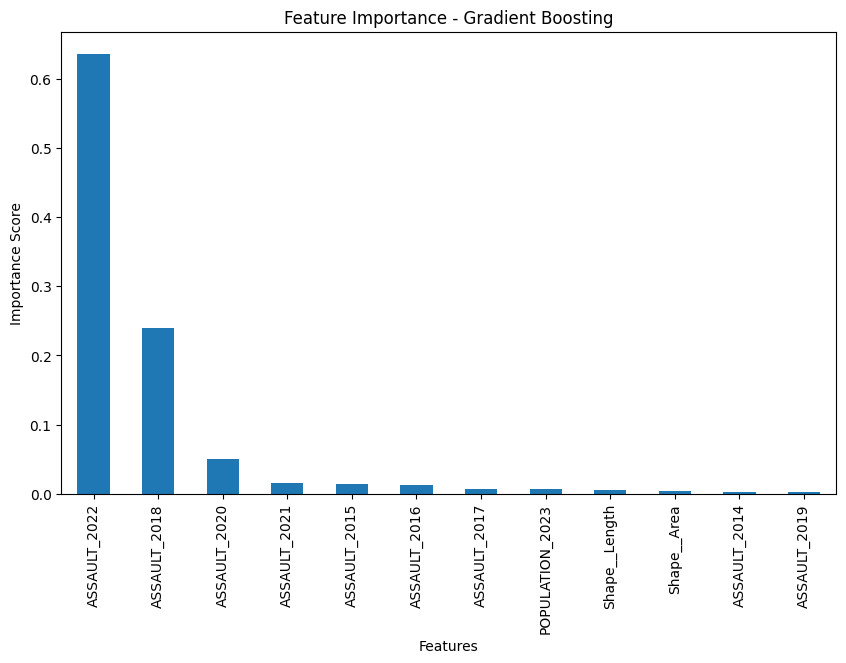

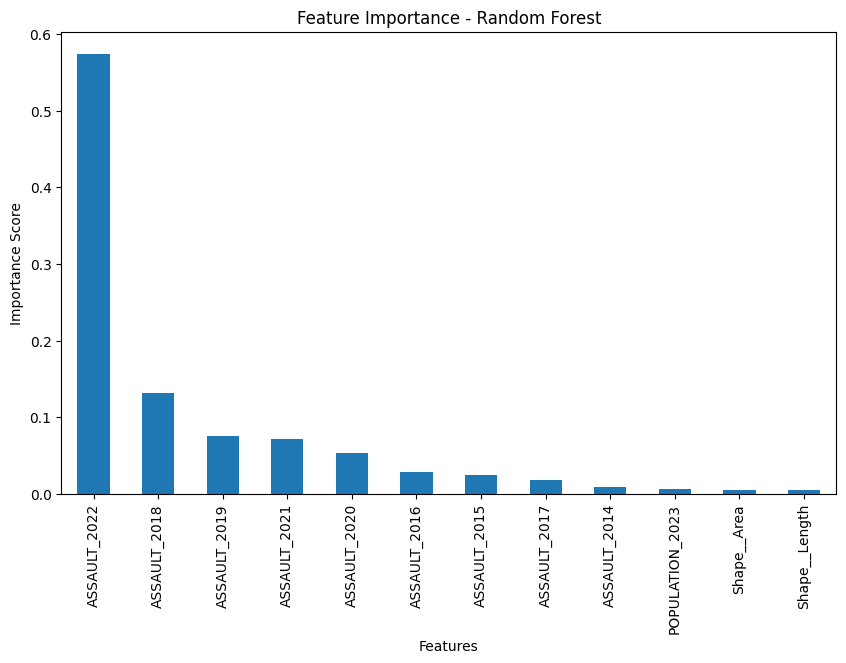

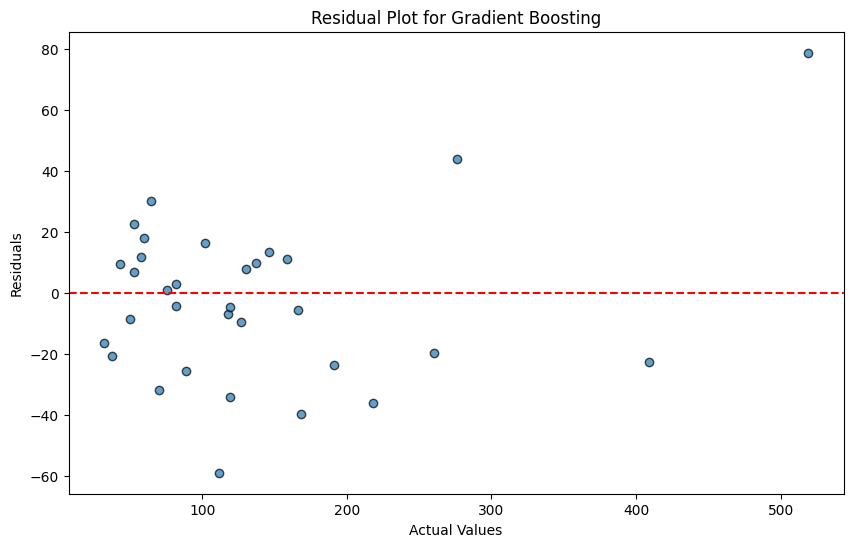

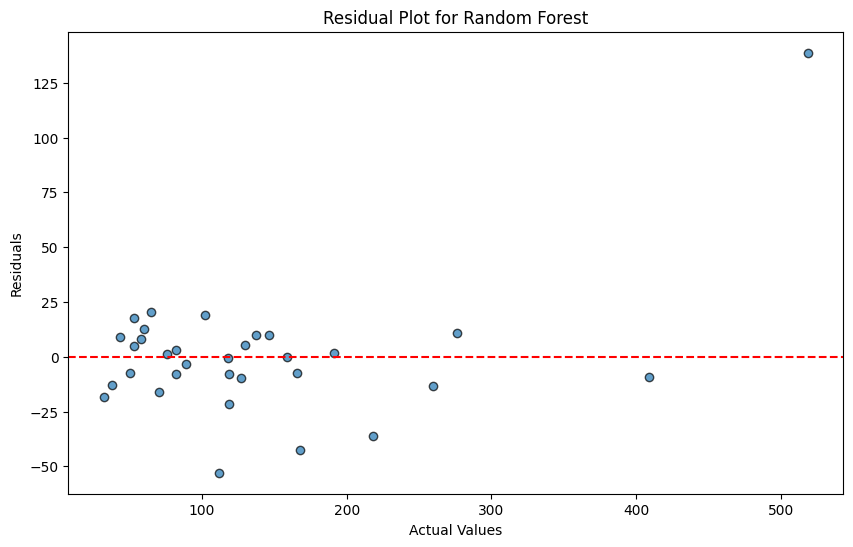

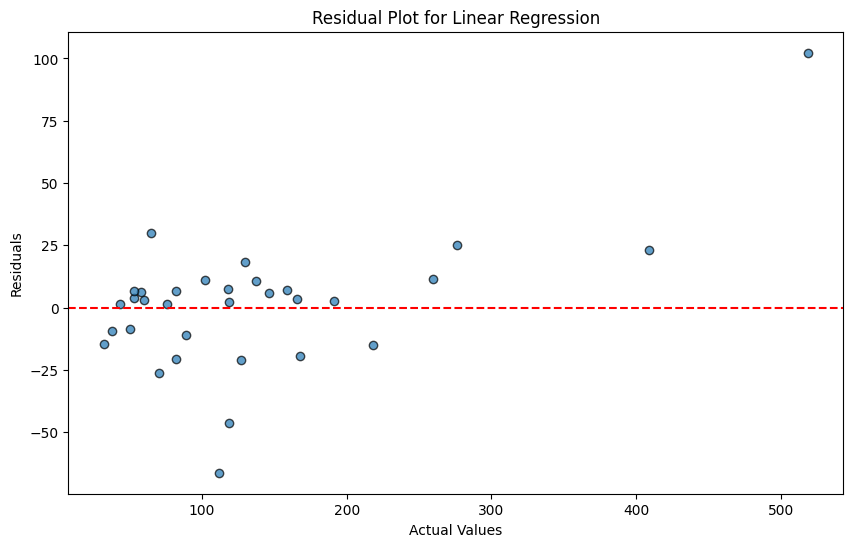

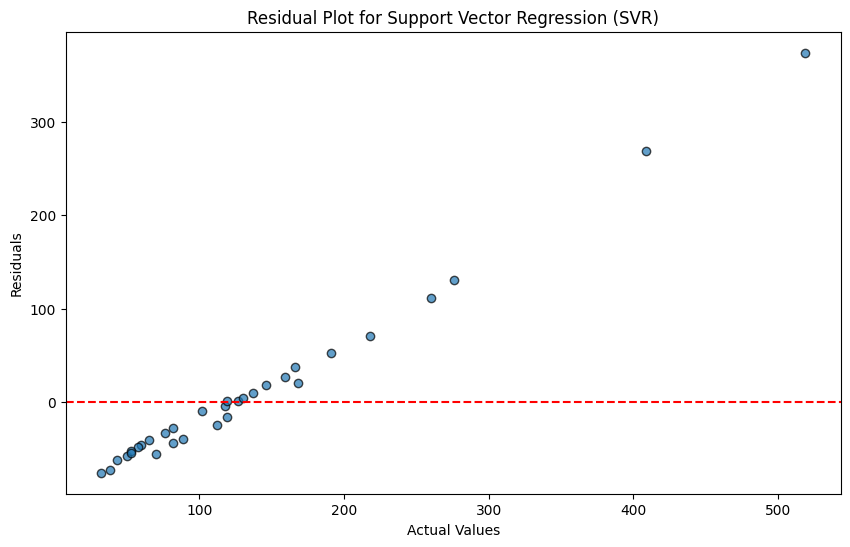

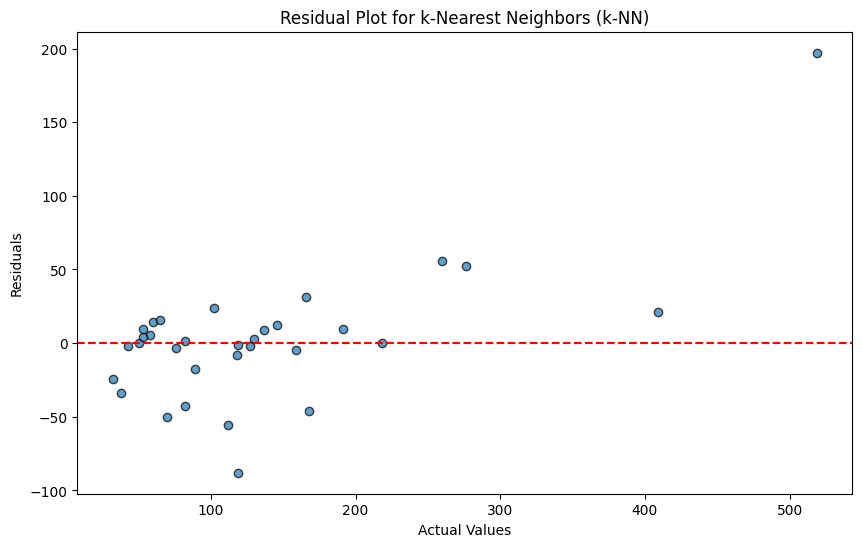

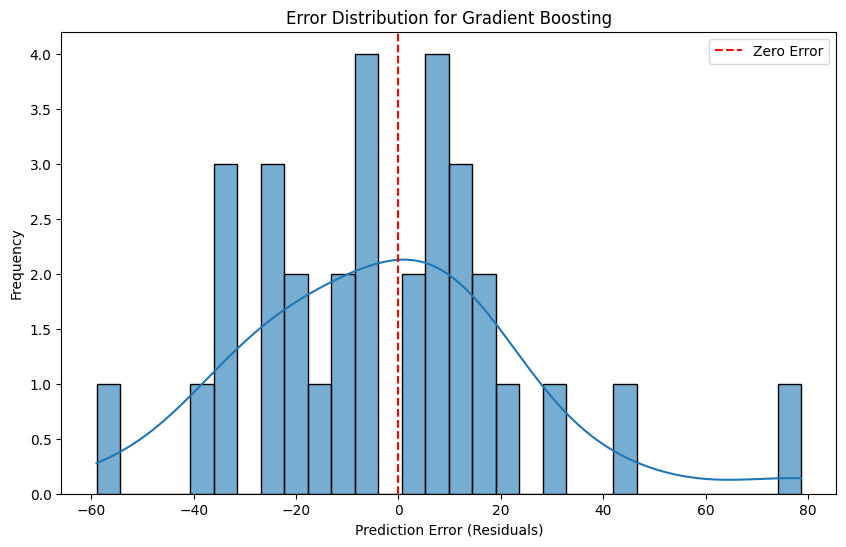

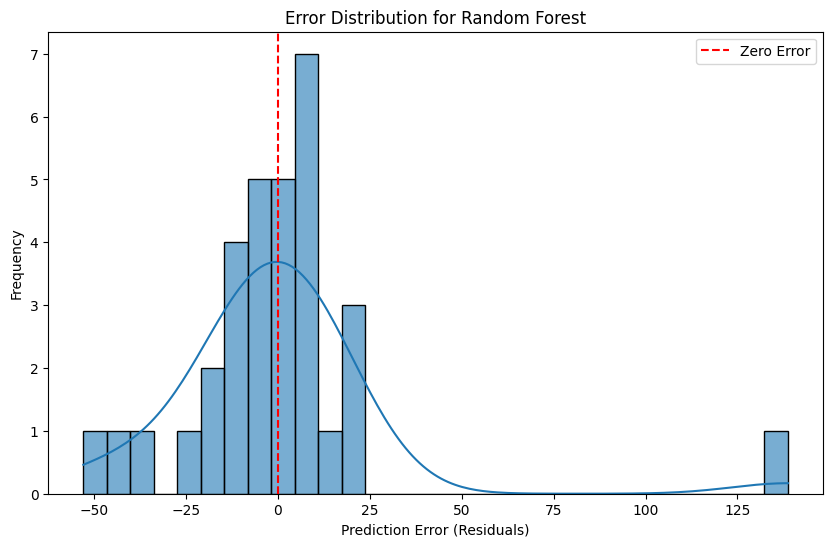

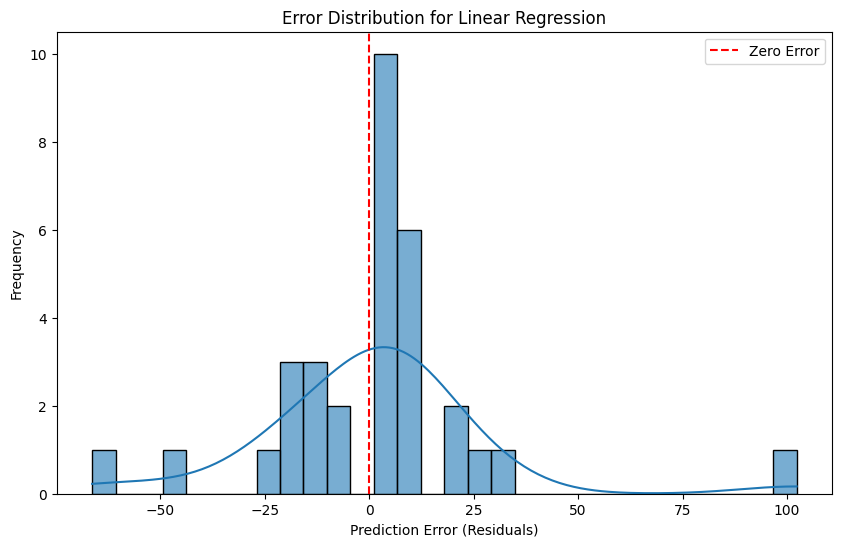

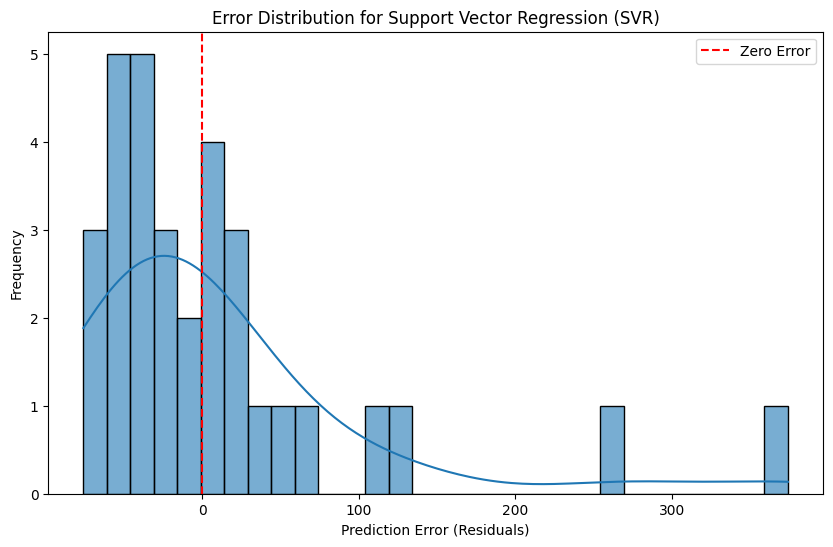

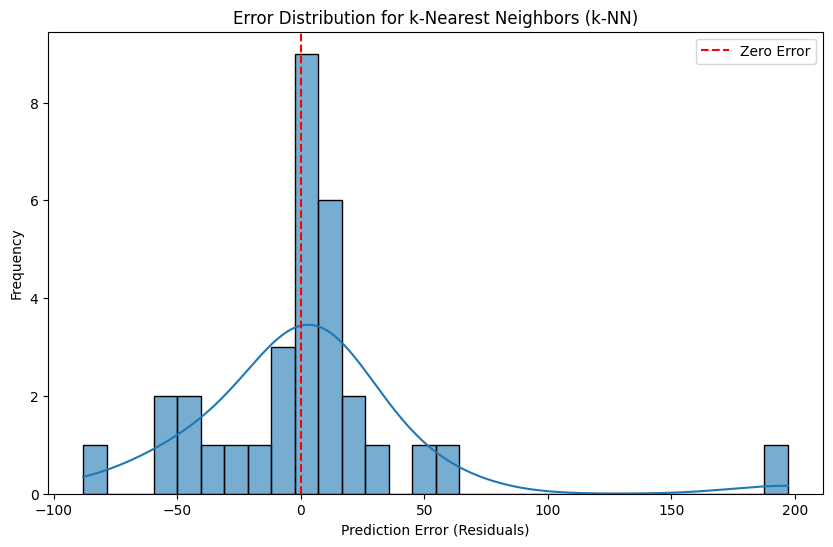

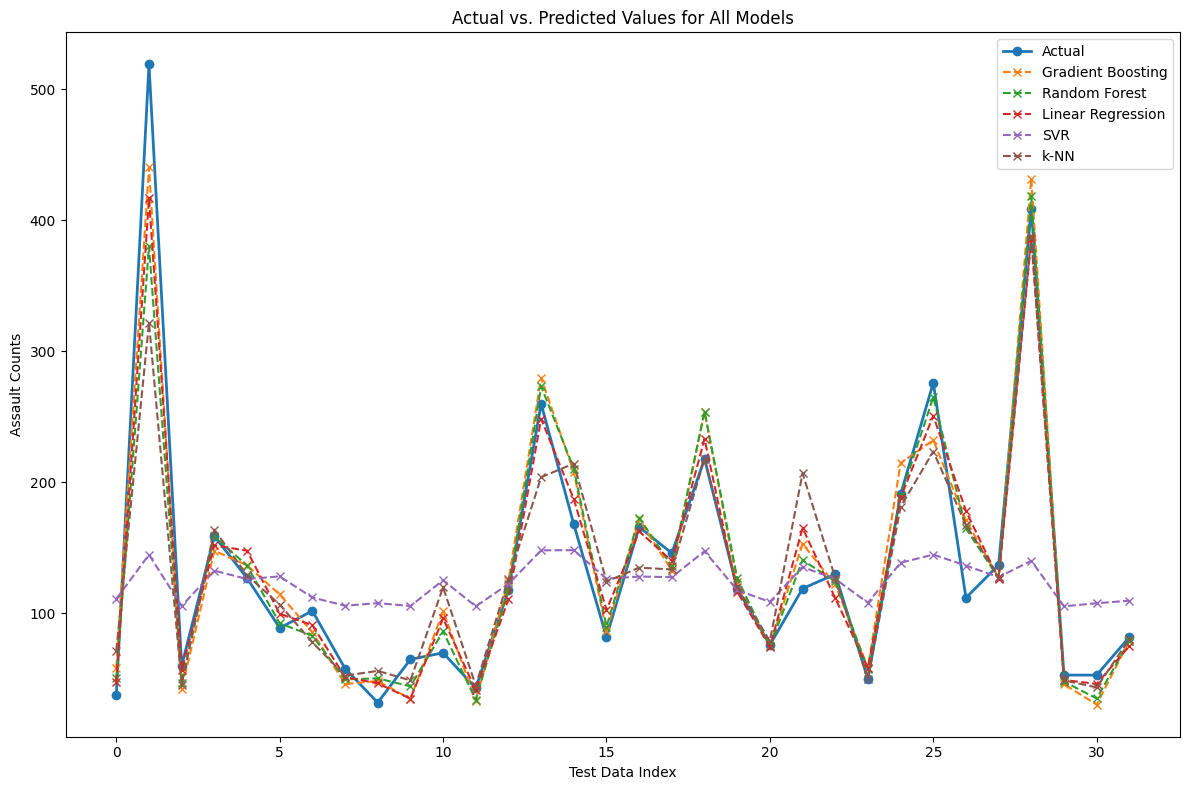

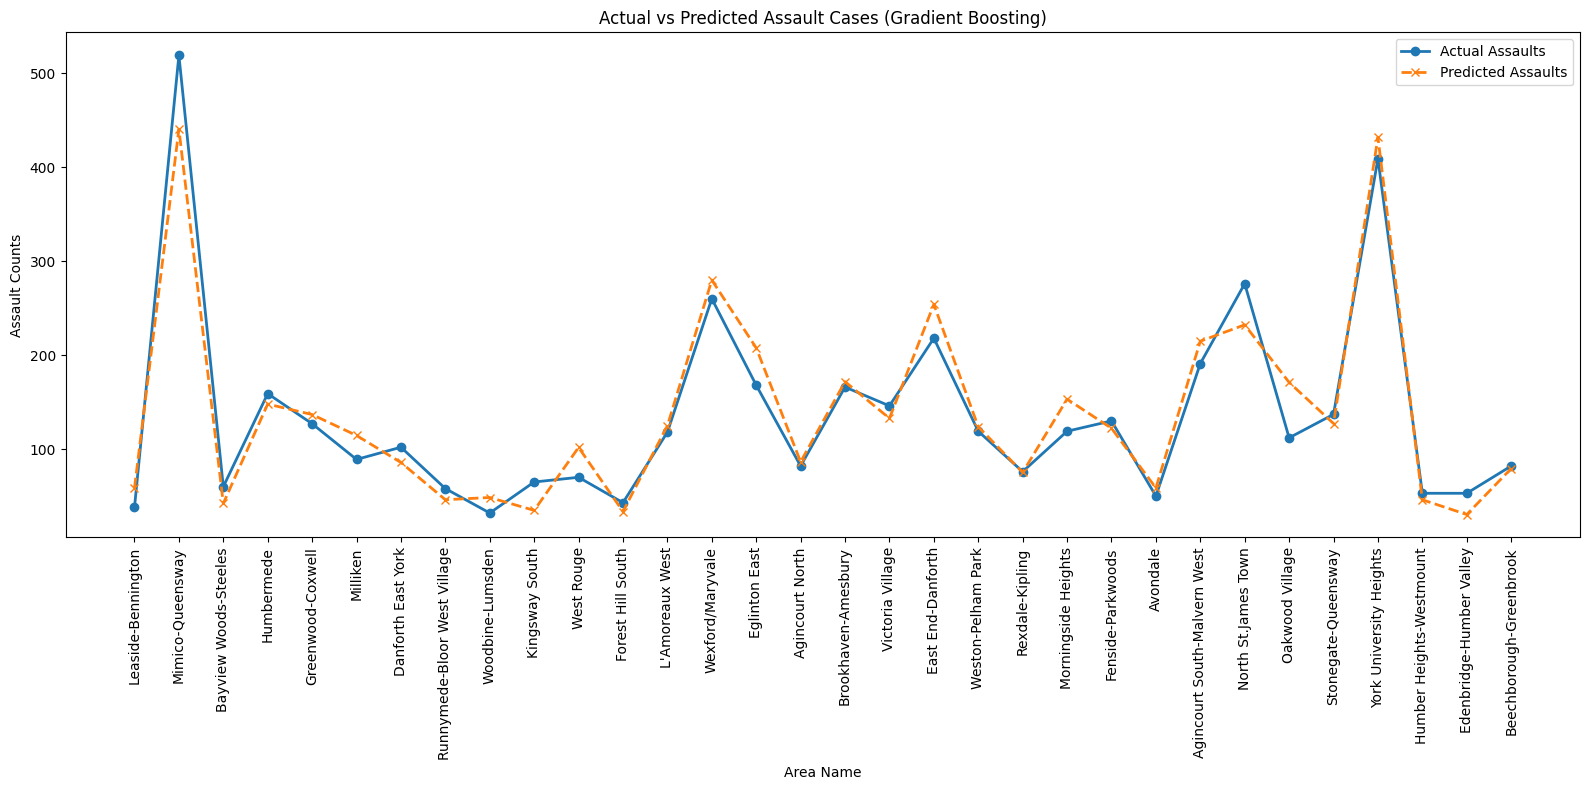

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("Assault.csv")

# Display data info for quick inspection
print(data.info())

# Drop rows with missing target values and handle missing features
data = data.dropna(subset=['ASSAULT_2023'])
features = [
    'ASSAULT_2014', 'ASSAULT_2015', 'ASSAULT_2016', 'ASSAULT_2017',
    'ASSAULT_2018', 'ASSAULT_2019', 'ASSAULT_2020', 'ASSAULT_2021',
    'ASSAULT_2022', 'POPULATION_2023', 'Shape__Area', 'Shape__Length'
]
target = 'ASSAULT_2023'

# Handle missing values in featuresc
data[features] = data[features].fillna(data[features].median())  # Fill missing with median values

# Scale features (especially important for SVR and k-NN)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(data[features])
y = data[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models with hyperparameter tuning for SVR and k-NN
models = {
    "Gradient Boosting": GradientBoostingRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100, max_depth=10),
    "Linear Regression": LinearRegression(),
    "Support Vector Regression (SVR)": SVR(C=1.0, epsilon=0.1, kernel='rbf'),
    "k-Nearest Neighbors (k-NN)": KNeighborsRegressor(n_neighbors=5)
}

# Train models and store results
trained_models = {}
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[name] = model
    y_pred = model.predict(X_test)
    results[name] = {
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "MAE": mean_absolute_error(y_test, y_pred),
        "R²": r2_score(y_test, y_pred),
        "Explained Variance": explained_variance_score(y_test, y_pred)
    }

# Convert results to DataFrame
results_df = pd.DataFrame(results).T
print("Model Performance Summary:")
print(results_df)

# Cross-validation
cv_results = {}
for name, model in trained_models.items():
    cv_rmse = -cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=5)
    cv_results[name] = {"Mean CV RMSE": cv_rmse.mean(), "Std CV RMSE": cv_rmse.std()}

cv_results_df = pd.DataFrame(cv_results).T
print("\nCross-Validation Results (5-Fold):")
print(cv_results_df)

# Feature Importance (for tree-based models)
feature_importance = {}
for name in ["Gradient Boosting", "Random Forest"]:
    feature_importance[name] = trained_models[name].feature_importances_

importance_df = pd.DataFrame(feature_importance, index=features)

# Plot feature importance
for model_name in importance_df.columns:
    plt.figure(figsize=(10, 6))
    importance_df[model_name].sort_values(ascending=False).plot(kind='bar', title=f"Feature Importance - {model_name}")
    plt.ylabel("Importance Score")
    plt.xlabel("Features")
    plt.show()

# Residual plots
for name, model in trained_models.items():
    y_pred = model.predict(X_test)
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, residuals, alpha=0.7, edgecolor='k')
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f"Residual Plot for {name}")
    plt.xlabel("Actual Values")
    plt.ylabel("Residuals")
    plt.show()

# Error Distribution
for name, model in trained_models.items():
    y_pred = model.predict(X_test)
    errors = y_test - y_pred
    plt.figure(figsize=(10, 6))
    sns.histplot(errors, kde=True, bins=30, alpha=0.6)
    plt.axvline(0, color="red", linestyle="--", label="Zero Error")
    plt.title(f"Error Distribution for {name}")
    plt.xlabel("Prediction Error (Residuals)")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

# Save results to CSV
results_df.to_csv("Model_Performance_Summary.csv", index=False)
cv_results_df.to_csv("Cross_Validation_Results.csv", index=False)
# Line graph: Actual vs. Predicted Values for All Models
comparison_df = pd.DataFrame({
    "Actual": y_test.reset_index(drop=True),
    "Gradient Boosting": trained_models["Gradient Boosting"].predict(X_test),
    "Random Forest": trained_models["Random Forest"].predict(X_test),
    "Linear Regression": trained_models["Linear Regression"].predict(X_test),
    "SVR": trained_models["Support Vector Regression (SVR)"].predict(X_test),
    "k-NN": trained_models["k-Nearest Neighbors (k-NN)"].predict(X_test),
})

# Plot actual vs. predicted values for all models
plt.figure(figsize=(12, 8))
plt.plot(comparison_df["Actual"], label="Actual", marker='o', linewidth=2)

for model_name in comparison_df.columns[1:]:
    plt.plot(comparison_df[model_name], label=model_name, linestyle='--', marker='x')

plt.title("Actual vs. Predicted Values for All Models")
plt.xlabel("Test Data Index")
plt.ylabel("Assault Counts")
plt.legend()
plt.tight_layout()
plt.show()

# Line graph: Actual vs. Predicted Assaults by Area (Gradient Boosting)
area_names = data.loc[y_test.index, "AREA_NAME"].reset_index(drop=True)
gb_predictions = trained_models["Gradient Boosting"].predict(X_test)

actual_vs_predicted_df = pd.DataFrame({
    "Area Name": area_names,
    "Actual Assaults": y_test.reset_index(drop=True),
    "Predicted Assaults (Gradient Boosting)": gb_predictions,
})

# Plot Actual vs Predicted Assaults for Gradient Boosting
plt.figure(figsize=(16, 8))
plt.plot(actual_vs_predicted_df["Area Name"], actual_vs_predicted_df["Actual Assaults"],
         label="Actual Assaults", marker='o', linewidth=2)
plt.plot(actual_vs_predicted_df["Area Name"], actual_vs_predicted_df["Predicted Assaults (Gradient Boosting)"],
         label="Predicted Assaults", linestyle='--', marker='x', linewidth=2)
plt.xticks(rotation=90)
plt.title("Actual vs Predicted Assault Cases (Gradient Boosting)")
plt.xlabel("Area Name")
plt.ylabel("Assault Counts")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import zipfile

# Simulated data to replicate plots from the code (replace with your actual data)
area_names = ["Area " + str(i) for i in range(1, 101)]
actual_values = np.random.randint(50, 500, size=100)
predicted_gb = actual_values + np.random.randint(-50, 50, size=100)
predicted_rf = actual_values + np.random.randint(-30, 30, size=100)
predicted_lr = actual_values + np.random.randint(-70, 70, size=100)

# Create directory to save plots
output_dir = "/mnt/data/plots"
os.makedirs(output_dir, exist_ok=True)

# Plot 1: Gradient Boosting
plt.figure(figsize=(14, 6))
plt.plot(area_names, actual_values, label="Actual (2023)", marker='o')
plt.plot(area_names, predicted_gb, label="Predicted (Gradient Boosting)", linestyle='--')
plt.xticks(rotation=90)
plt.title("Actual vs Predicted Auto Theft Cases (2023) - Gradient Boosting")
plt.xlabel("Area Name")
plt.ylabel("Auto Theft Cases")
plt.legend()
plt.tight_layout()
gb_path = os.path.join(output_dir, "gradient_boosting.png")
plt.savefig(gb_path)
plt.close()

# Plot 2: Random Forest
plt.figure(figsize=(14, 6))
plt.plot(area_names, actual_values, label="Actual (2023)", marker='o')
plt.plot(area_names, predicted_rf, label="Predicted (Random Forest)", linestyle='--')
plt.xticks(rotation=90)
plt.title("Actual vs Predicted Auto Theft Cases (2023) - Random Forest")
plt.xlabel("Area Name")
plt.ylabel("Auto Theft Cases")
plt.legend()
plt.tight_layout()
rf_path = os.path.join(output_dir, "random_forest.png")
plt.savefig(rf_path)
plt.close()

# Plot 3: Linear Regression
plt.figure(figsize=(14, 6))
plt.plot(area_names, actual_values, label="Actual (2023)", marker='o')
plt.plot(area_names, predicted_lr, label="Predicted (Linear Regression)", linestyle='--')
plt.xticks(rotation=90)
plt.title("Actual vs Predicted Auto Theft Cases (2023) - Linear Regression")
plt.xlabel("Area Name")
plt.ylabel("Auto Theft Cases")
plt.legend()
plt.tight_layout()
lr_path = os.path.join(output_dir, "linear_regression.png")
plt.savefig(lr_path)
plt.close()

# Zip the plots
zip_path = "/mnt/data/plots.zip"
with zipfile.ZipFile(zip_path, 'w') as zipf:
    for root, dirs, files in os.walk(output_dir):
        for file in files:
            zipf.write(os.path.join(root, file), arcname=file)

zip_path


'/mnt/data/plots.zip'